 <h1 align="center">Find a car Park</h1>

 <h3 align="center">Authors: Noa Aizer & Ido Shapira & Shay Leyzerovich</h3>   

In this project we propose to develop a model for identifying whether there is free space in theparking lot image, or whether the parking is full.

# Report:

## Code & Explanations:

### Import all the necessary libraries:
We have used Python libraries:
- tensorflow v1

In [44]:
import tensorflow.compat.v1 as tf
# import tensorflow as tf
import cv2
import os
from tqdm import tqdm
import numpy as np
import random as rn

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix
from sklearn import metrics


import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

### fix random seed:

In [45]:
np.random.seed(42)
rn.seed(42)
tf.set_random_seed(42)

our original data set is 5 gb but in order to use it properly we had to take only half of it

(-decide how many data to take-)

### import the data:

In [3]:
X = []
Z = []
IMG_SIZE=150
FREE_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Free_half'
FULL_DIR='C:/Users/USER/Desktop/Ariel University/שנה ג סמסטר א/למידה עמוקה ועיבוד שפות טבעיות/project/data/Full_half_half'

In [4]:
def make_train_data(label,DIR):
    for img in tqdm(os.listdir(DIR)):
        path = os.path.join(DIR,img)
        img = plt.imread(path)
# #         img = cv2.imread(path)
        img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))   # maybe we will get better result without resizing the images
        np_img=np.asarray(img)
        X.append(np_img)
        Z.append(str(label))

In [5]:
# make 'Free' data
make_train_data('Free',FREE_DIR)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 89/89 [00:03<00:00, 27.82it/s]

89


In [6]:
# make 'Full' data
make_train_data('Full',FULL_DIR)
print(len(X))

100%|██████████████████████████████████████████████████████████████████████████████████| 54/54 [00:02<00:00, 26.80it/s]

143


### The description of the data:

1. Number of instances: ---

2. Number of attributes: --- (type here what is the feature)

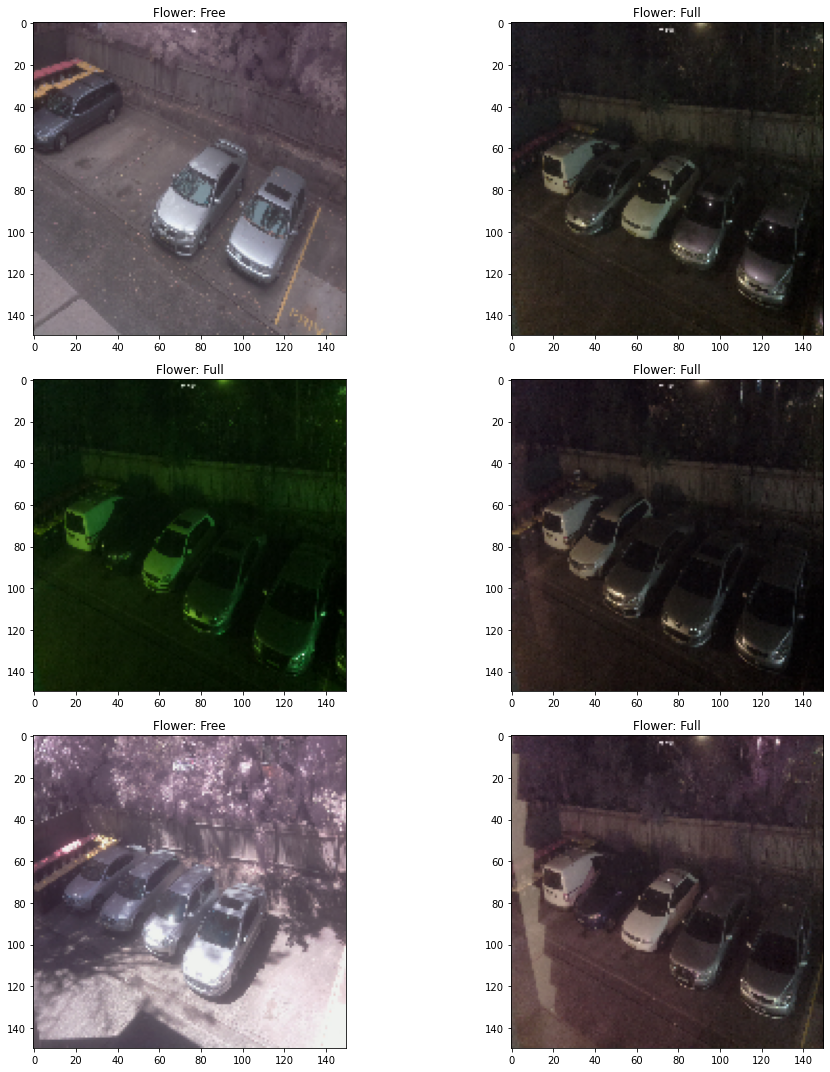

In [7]:
# check some image
fig,ax=plt.subplots(3,2)
fig.set_size_inches(15,15)
for i in range(3):
    for j in range (2):
        l=rn.randint(0,len(Z))
        ax[i,j].imshow(X[l])
        ax[i,j].set_title('Flower: '+Z[l])
        
plt.tight_layout()

### Label encoding of the target:
'Free' = 1

'Full' = 0

In [8]:
le=LabelEncoder()
Y=le.fit_transform(Z)
# Y = pd.Series(Z).replace({'Free':1,'Full':0},inplace=True)

### normalization and flatten the images:

In [9]:
# X = np.array([cv2.normalize(X[i], None, 0, 255, cv2.NORM_MINMAX) for i in range(len(X))]) # normalization maybe better
X=np.array(X)/255
X=np.array([X[i].flatten() for i in range(len(X))]) # flatten the images

In [10]:
df = pd.DataFrame(data=X) # we need this ?
df

,0,1,2,3,4,5,6,7,8,9,...,67490,67491,67492,67493,67494,67495,67496,67497,67498,67499
0,0.286275,0.243137,0.290196,0.294118,0.247059,0.301961,0.349020,0.290196,0.333333,0.349020,...,0.580392,0.552941,0.584314,0.670588,0.498039,0.498039,0.580392,0.419608,0.431373,0.482353
1,0.282353,0.231373,0.290196,0.278431,0.231373,0.270588,0.325490,0.274510,0.321569,0.345098,...,0.572549,0.525490,0.545098,0.623529,0.482353,0.478431,0.560784,0.392157,0.400000,0.466667
2,0.294118,0.243137,0.282353,0.294118,0.239216,0.282353,0.345098,0.294118,0.329412,0.349020,...,0.560784,0.549020,0.556863,0.643137,0.494118,0.505882,0.568627,0.400000,0.415686,0.470588
3,0.290196,0.231373,0.278431,0.286275,0.235294,0.274510,0.325490,0.274510,0.313725,0.333333,...,0.545098,0.537255,0.556863,0.631373,0.498039,0.498039,0.549020,0.411765,0.427451,0.458824
4,0.266667,0.219608,0.266667,0.262745,0.227451,0.270588,0.352941,0.282353,0.329412,0.341176,...,0.650980,0.600000,0.658824,0.733333,0.682353,0.670588,0.709804,0.486275,0.509804,0.564706
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
138,0.521569,0.407843,0.482353,0.509804,0.403922,0.466667,0.482353,0.388235,0.435294,0.462745,...,0.552941,0.462745,0.439216,0.470588,0.439216,0.411765,0.454902,0.654902,0.635294,0.717647
139,0.415686,0.333333,0.400000,0.541176,0.462745,0.513725,0.568627,0.435294,0.501961,0.458824,...,0.301961,0.278431,0.254902,0.294118,0.270588,0.239216,0.270588,0.278431,0.247059,0.278431
140,0.050980,0.125490,0.039216,0.066667,0.125490,0.035294,0.047059,0.105882,0.023529,0.066667,...,0.007843,0.011765,0.047059,0.000000,0.062745,0.113725,0.003922,0.054902,0.090196,0.003922
141,0.129412,0.094118,0.168627,0.156863,0.141176,0.196078,0.109804,0.098039,0.149020,0.145098,...,0.082353,0.113725,0.109804,0.098039,0.086275,0.078431,0.074510,0.066667,0.074510,0.054902


In [11]:
X.shape

(143, 67500)

### Train-Test Split:

We divide the set into two classes: 66% for training and 33% for testing. 
As we see we have a balancing problem- there much more patients with Non-recurrent than recurrent so we need to take it in account while spliting the data in order to have enough patients with recurrent in the training set but also to have some in the testing. 

(-Change this to our dataset-)

In [12]:
# Maybe put normolize here

In [13]:
# separate data
X_train,X_test,y_train,y_test=train_test_split(X,Y,test_size=0.25,random_state=42)

# freqs = pd.DataFrame({"Training dataset": [(y_train == 1).sum(),(y_train == -1).sum()],
#                       "Test dataset": [(y_test == 1).sum(),(y_test == -1).sum()],
#                       "Total": [(y_train == 1).sum()+(y_test == 1).sum(),(y_train == -1).sum()+(y_test == -1).sum()]},
#                      index=["Recurrent", "Nonrecurrent"])
# freqs[["Training dataset", "Test dataset", "Total"]]

### Begin building the Logistic-Regression model using tensorflow.v1:

1. Declare the variables that need to be learned and initialization.
   
   The number of variable is the number of the features (X.shape[1], 1)

In [61]:
tf.compat.v1.disable_eager_execution()
W = tf.Variable(tf.zeros(shape=[X.shape[1], 1])) # tf.random_normal maybe better
b = tf.Variable(tf.zeros(shape=[1, 1]))
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

2. Define placeholders

In [62]:
data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
target = tf.placeholder(dtype=tf.float32, shape=[None, 1])

3. Declare the model you need to learn

In [63]:
mod = tf.matmul(data, W) + b
# y = 1 / (1.0 + tf.exp(-(tf.matmul(data,W) + b))) # tf.nn.sigmoid(tf.matmul(data,W) + b) maybe better

4. First, we declare the loss function.
    
    Then we use the sigmoid cross-entropy loss function,
    
    meaning, first doing a sigmoid on the model result and then using the cross-entropy loss function.

In [64]:
loss = tf.reduce_mean(tf.nn.sigmoid_cross_entropy_with_logits(logits=mod, labels=target))

5. Define the requires parameters:
    - learning rate
    - batch_size
    - number of iteration

In [65]:
learning_rate = 0.003
batch_size = 30
iter_num = 2000 # overfitting when it 5000

6. Define the optimizer

In [66]:
opt = tf.train.GradientDescentOptimizer(learning_rate)

7. Define the goal
    
   We want to minimize the loss function using the Gradient-Decent method

In [67]:
goal = opt.minimize(loss)

8. Define the accuracy

In [68]:
# The default threshold is 0.5, rounded off directly
prediction = tf.round(tf.sigmoid(mod))
# Bool into float32 type
correct = tf.cast(tf.equal(prediction, target), dtype=tf.float32)
# Average
accuracy = tf.reduce_mean(correct)

### End of the definition of the model framework

In [69]:
# Define the variable that stores the result
loss_trace = []
train_acc = []
test_acc = []

### Start training the  Logistic-Regression model:

In [70]:
for epoch in range(iter_num):
    # Generate random batch index
    batch_index = np.random.choice(len(X_train), size=batch_size)
    batch_train_X = X_train[batch_index]
    batch_train_y = np.matrix(y_train[batch_index]).T
    sess.run(goal, feed_dict={data: batch_train_X, target: batch_train_y})
    temp_loss = sess.run(loss, feed_dict={data: batch_train_X, target: batch_train_y})
    # convert into a matrix, and the shape of the placeholder to correspond
    temp_train_acc = sess.run(accuracy, feed_dict={data: X_train, target: np.matrix(y_train).T})
    temp_test_acc = sess.run(accuracy, feed_dict={data: X_test, target: np.matrix(y_test).T})
    # recode the result
    loss_trace.append(temp_loss)
    train_acc.append(temp_train_acc)
    test_acc.append(temp_test_acc)
    # output
    if (epoch + 1) % 300 == 0:
        print('epoch: {:4d} loss: {:5f} train_acc: {:5f} test_acc: {:5f}'.format(epoch + 1, temp_loss,
                                                                          temp_train_acc, temp_test_acc))

epoch:  300 loss: 0.417745 train_acc: 0.813084 test_acc: 0.722222
epoch:  600 loss: 0.051912 train_acc: 0.962617 test_acc: 0.750000
epoch:  900 loss: 0.056671 train_acc: 0.990654 test_acc: 0.805556
epoch: 1200 loss: 0.090532 train_acc: 0.990654 test_acc: 0.777778
epoch: 1500 loss: 0.038629 train_acc: 1.000000 test_acc: 0.722222
epoch: 1800 loss: 0.036447 train_acc: 1.000000 test_acc: 0.777778


### Visualization of the loss function results:

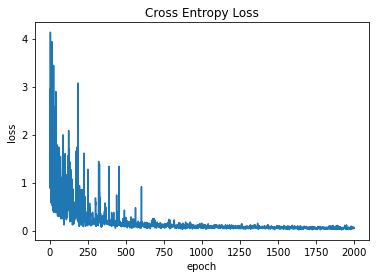

In [71]:
plt.plot(loss_trace)
plt.title('Cross Entropy Loss')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.show()

In [72]:
# y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})
y_predictions = sess.run(prediction, feed_dict={data: X_test, target: np.matrix(y_test).T})

In [73]:
tf.compat.v1.math.confusion_matrix
con = tf.math.confusion_matrix(y_test, prediction, num_classes=2, dtype=tf.float32)

In [74]:
sess = tf.Session()
with sess.as_default():
        print(sess.run(con))

InvalidArgumentError: You must feed a value for placeholder tensor 'Placeholder_4' with dtype float and shape [?,67500]
	 [[node Placeholder_4 (defined at <ipython-input-62-89bb4941379f>:1) ]]

Original stack trace for 'Placeholder_4':
  File "C:\Users\USER\anaconda3\lib\runpy.py", line 194, in _run_module_as_main
    return _run_code(code, main_globals, None,
  File "C:\Users\USER\anaconda3\lib\runpy.py", line 87, in _run_code
    exec(code, run_globals)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel_launcher.py", line 16, in <module>
    app.launch_new_instance()
  File "C:\Users\USER\anaconda3\lib\site-packages\traitlets\config\application.py", line 664, in launch_instance
    app.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelapp.py", line 612, in start
    self.io_loop.start()
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\platform\asyncio.py", line 149, in start
    self.asyncio_loop.run_forever()
  File "C:\Users\USER\anaconda3\lib\asyncio\base_events.py", line 570, in run_forever
    self._run_once()
  File "C:\Users\USER\anaconda3\lib\asyncio\base_events.py", line 1859, in _run_once
    handle._run()
  File "C:\Users\USER\anaconda3\lib\asyncio\events.py", line 81, in _run
    self._context.run(self._callback, *self._args)
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\ioloop.py", line 690, in <lambda>
    lambda f: self._run_callback(functools.partial(callback, future))
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\ioloop.py", line 743, in _run_callback
    ret = callback()
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\gen.py", line 787, in inner
    self.run()
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\gen.py", line 748, in run
    yielded = self.gen.send(value)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 365, in process_one
    yield gen.maybe_future(dispatch(*args))
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 268, in dispatch_shell
    yield gen.maybe_future(handler(stream, idents, msg))
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\kernelbase.py", line 543, in execute_request
    self.do_execute(
  File "C:\Users\USER\anaconda3\lib\site-packages\tornado\gen.py", line 209, in wrapper
    yielded = next(result)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\ipkernel.py", line 306, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "C:\Users\USER\anaconda3\lib\site-packages\ipykernel\zmqshell.py", line 536, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2866, in run_cell
    result = self._run_cell(
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 2895, in _run_cell
    return runner(coro)
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\async_helpers.py", line 68, in _pseudo_sync_runner
    coro.send(None)
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3071, in run_cell_async
    has_raised = await self.run_ast_nodes(code_ast.body, cell_name,
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3263, in run_ast_nodes
    if (await self.run_code(code, result,  async_=asy)):
  File "C:\Users\USER\anaconda3\lib\site-packages\IPython\core\interactiveshell.py", line 3343, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-62-89bb4941379f>", line 1, in <module>
    data = tf.placeholder(dtype=tf.float32, shape=[None, X.shape[1]])
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\ops\array_ops.py", line 3100, in placeholder
    return gen_array_ops.placeholder(dtype=dtype, shape=shape, name=name)
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\ops\gen_array_ops.py", line 6808, in placeholder
    _, _, _op, _outputs = _op_def_library._apply_op_helper(
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\op_def_library.py", line 742, in _apply_op_helper
    op = g._create_op_internal(op_type_name, inputs, dtypes=None,
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 3477, in _create_op_internal
    ret = Operation(
  File "C:\Users\USER\anaconda3\lib\site-packages\tensorflow\python\framework\ops.py", line 1949, in __init__
    self._traceback = tf_stack.extract_stack()


# LogisticRegression using sklearn

In [26]:
log_reg = LogisticRegression()
log_reg.fit(X_train,y_train)
y_pred = log_reg.predict(X_test)

C:\Users\USER\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


#### Function for computing the confusing matrix:

In [27]:
def cm_analysis(y_true, y_pred, labels, figsize=(7,6)):
    cm = confusion_matrix(y_true, y_pred, labels=labels)
    cm_sum = np.sum(cm, axis=1, keepdims=True)
    cm_perc = cm / cm_sum.astype(float) * 100
    annot = np.empty_like(cm).astype(str)
    nrows, ncols = cm.shape
    for i in range(nrows):
        for j in range(ncols):
            c = cm[i, j]
            p = cm_perc[i, j]
            if i == j:
                s = cm_sum[i]
                annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
            elif c == 0:
                annot[i, j] = '0'
            else:
                annot[i, j] = '%.1f%%\n%d' % (p, c)
    cm = pd.DataFrame(cm, index=labels, columns=labels)
    cm.index.name = 'Actual'
    cm.columns.name = 'Predicted'
    fig, ax = plt.subplots(figsize=figsize)
    sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')
    #plt.savefig(filename)
    plt.show()

In [28]:
pred, counts = np.unique(y_pred, return_counts=True)
dict(zip(pred, counts))

{0: 27, 1: 9}

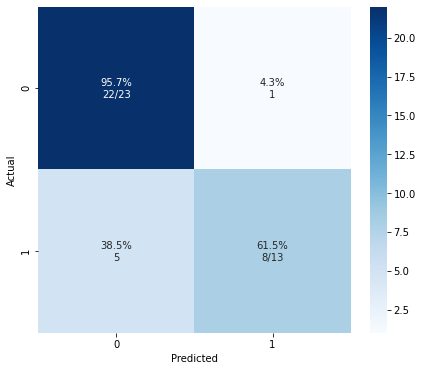

In [29]:
cm_analysis(y_test, y_pred, log_reg.classes_)

In [30]:
metrics.accuracy_score(y_test, y_pred)

0.8333333333333334

In [ ]:
print("Accuracy of Logistic Regression (cross-validation): ",cross_val_score(log_reg, X, y, cv=10, scoring='accuracy').mean())